In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [110]:
data = pd.read_csv("/content/drive/MyDrive/finalLastActDataset.csv")
data.shape

(566, 13)

In [112]:
data.groupby('stress')['user'].count()

stress
2.0      13
3.0      13
4.0      26
5.0     101
6.0     140
7.0      86
8.0      99
9.0      56
10.0     32
Name: user, dtype: int64

In [113]:
data['stress'] = data['stress'].replace(2.0, 0)
data['stress'] = data['stress'].replace(3.0, 0)
data['stress'] = data['stress'].replace(4.0, 1)
data['stress'] = data['stress'].replace(5.0, 1)
data['stress'] = data['stress'].replace(6.0, 1)
data['stress'] = data['stress'].replace(7.0, 1)
data['stress'] = data['stress'].replace(8.0, 1)
data['stress'] = data['stress'].replace(9.0, 2)
data['stress'] = data['stress'].replace(10.0, 2)
data.groupby('stress')['user'].count()

stress
0.0     26
1.0    452
2.0     88
Name: user, dtype: int64

In [86]:
df = data.values
# split into input and output elements
X, y = df[:, 2:-1], df[:, -1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [114]:
labels = data['stress'].unique()
labels

array([1., 2., 0.])

Class=1, n=452 (79.859%)
Class=2, n=88 (15.548%)
Class=0, n=26 (4.594%)


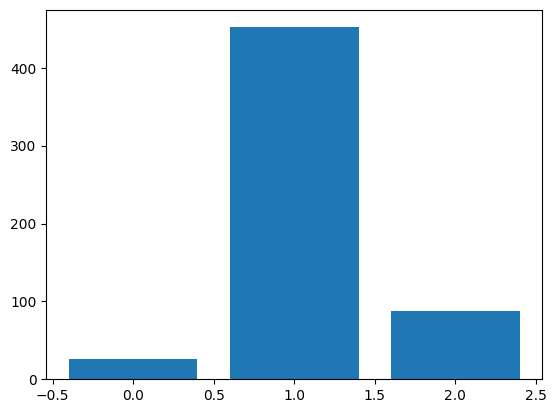

In [115]:
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from collections import Counter

df = data.values
# split into input and output elements
X, y = df[:, 2:-1], df[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=452 (33.333%)
Class=2, n=452 (33.333%)
Class=0, n=452 (33.333%)


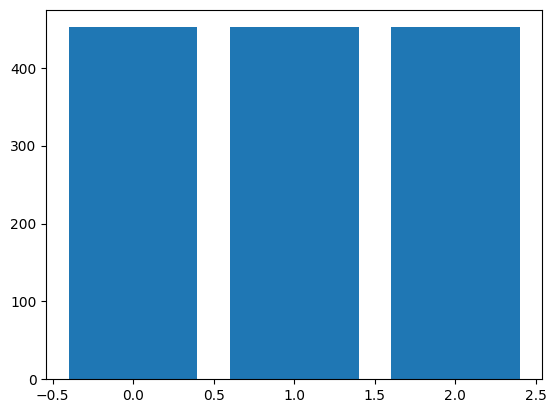

In [123]:
from imblearn.over_sampling import SMOTE
df = data.values
# split into input and output elements
X, y = df[:, 2:-1], df[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [124]:
data.columns

Index(['user', 'date', 'sum_household', 'sum_meal', 'sum_outdoor_act',
       'sum_personal_care', 'sum_recreation', 'sum_sleep', 'sum_socialising',
       'sum_study', 'sum_travel', 'sum_work', 'stress'],
      dtype='object')

In [125]:
columns = ['sum_household', 'sum_meal', 'sum_outdoor_act',
       'sum_personal_care', 'sum_recreation', 'sum_sleep', 'sum_socialising',
       'sum_study', 'sum_travel', 'sum_work']
X_df = pd.DataFrame(X, columns=columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_df, y, test_size=0.3, random_state=42)

NameError: name 'X_df' is not defined

In [ ]:
X_test.shape

(406, 10)

In [ ]:
labels = np.unique(y)
labels

array([0, 1, 2])

In [97]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Dropout
# convlstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical
from keras.layers import Bidirectional
from matplotlib import pyplot
from tensorflow.keras import metrics

In [119]:
X = X.reshape((X.shape[0], X.shape[1], 1))
y_labels = to_categorical(y)
print(f"Stacked sequences shape: {X.shape}, {y_labels.shape}")
X_train, X_test,y_train, y_test = train_test_split(X,y_labels,random_state=104,test_size=0.2,shuffle=True)

Stacked sequences shape: (1356, 10, 1), (1356, 3)


In [99]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 16
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(LSTM(50, input_shape=(n_timesteps,n_features)))
 model.add(Dropout(0.2))
 model.add(Dense(50, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.CategoricalAccuracy(), metrics.Precision(), metrics.Recall()])
 #keras.utils.plot_model.plot_model(model, show_shapes=True)
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy, precision, recall = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy, precision, recall

In [100]:
# fit and evaluate a model
def evaluate_bimodel(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 16
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Bidirectional(LSTM(50, input_shape=(n_timesteps,n_features))))
 model.add(Dropout(0.2))
 model.add(Dense(50, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.CategoricalAccuracy(), metrics.Precision(), metrics.Recall()])
 #keras.utils.plot_model(model, show_shapes=True)
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy, precision, recall = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy, precision, recall

In [101]:
# summarize scores
def summarize_results(metric, scores):
 #print(scores)
 m, s = mean(scores), std(scores)
 print(metric,': %.3f%% (+/-%.3f)' % (m, s))

In [120]:
# run an experiment
def run_experiment(model,repeats=5):
 # repeat experiment
 scores = list()
 precisionScores = list()
 recallScores = list()
 for r in range(repeats):
  if(model=='lstm'):
    accuracy, precision, recall = evaluate_model(X_train, y_train, X_test, y_test)
  elif(model=="bilstm"):
    accuracy, precision, recall = evaluate_bimodel(X_train, y_train, X_test, y_test)
  accuracy = accuracy*100.0
  precision = precision*100.0
  recall = recall*100.0
  print('>#%d: %.3f  %.3f  %.3f' % (r+1, accuracy, precision, recall))
  scores.append(accuracy)
  precisionScores.append(precision)
  recallScores.append(recall)
 # summarize results
 summarize_results('Accuracy',scores)
 summarize_results('Precision', precisionScores)
 summarize_results('recall',recallScores)

In [121]:
run_experiment('lstm')

>#1: 66.912  69.528  59.559
>#2: 64.338  71.366  59.559
>#3: 65.809  72.646  59.559
>#4: 66.544  73.303  59.559
>#5: 66.176  66.397  60.294
Accuracy : 65.956% (+/-0.888)
Precision : 70.648% (+/-2.485)
recall : 59.706% (+/-0.294)


In [122]:
run_experiment('bilstm')

>#1: 72.059  73.984  66.912
>#2: 73.529  78.926  70.221
>#3: 72.794  77.178  68.382
>#4: 71.324  76.033  67.647
>#5: 72.794  73.600  67.647
Accuracy : 72.500% (+/-0.750)
Precision : 75.944% (+/-1.988)
recall : 68.162% (+/-1.130)


In [126]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split( X_df, y, test_size=0.3, random_state=42)
#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_test)
#rbf_pred = rbf.predict(X_test)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_precision = precision_score(y_test, poly_pred, average='weighted')
poly_recall = recall_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.3f" % (poly_accuracy*100))
print('Precision (Polynomial Kernel): ', "%.3f" % (poly_precision*100))
print('Recall (Polynomial Kernel): ', "%.3f" % (poly_recall*100))

Accuracy (Polynomial Kernel):  56.020
Precision (Polynomial Kernel):  69.688
Recall (Polynomial Kernel):  56.020
